# ***Simple Linear Regression Case Study***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/cgpa_salary_dataset.csv')

In [3]:
df.head()

,CGPA,Salary_Package
0,6.87,14.02
1,9.75,18.67
2,8.66,16.64
3,7.99,16.78
4,5.78,11.77


In [4]:
df.tail()

,CGPA,Salary_Package
195,6.75,14.36
196,8.63,17.98
197,9.49,18.84
198,9.44,19.38
199,8.90,18.31


In [5]:
df.isnull().sum()

,0
CGPA,0
Salary_Package,0


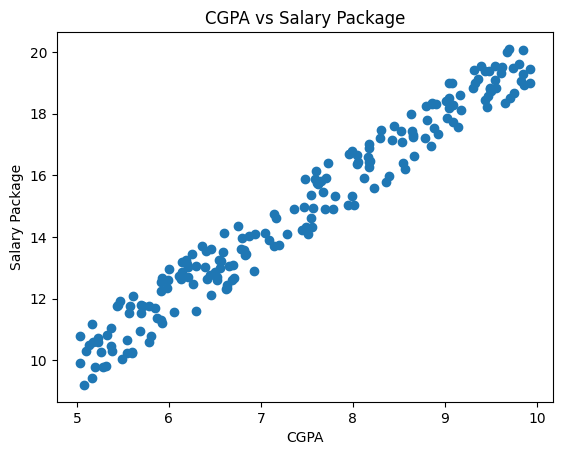

In [6]:
plt.scatter(df['CGPA'], df['Salary_Package'])
plt.title('CGPA vs Salary Package')
plt.xlabel('CGPA')
plt.ylabel('Salary Package')
plt.show()

In [7]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [8]:
X

,CGPA
0,6.87
1,9.75
2,8.66
3,7.99
4,5.78
...,...
195,6.75
196,8.63
197,9.49
198,9.44


In [9]:
y

,Salary_Package
0,14.02
1,18.67
2,16.64
3,16.78
4,11.77
...,...
195,14.36
196,17.98
197,18.84
198,19.38


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [13]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [14]:
lr.fit(X_train, y_train)

LinearRegression()

In [15]:
X_train

,CGPA
137,8.52
163,7.68
111,5.81
123,5.55
109,5.38
...,...
43,9.55
22,6.46
72,5.03
15,5.92


In [16]:
y_train

,Salary_Package
137,17.45
163,15.45
111,10.78
123,10.66
109,10.30
...,...
43,18.84
22,12.11
72,10.79
15,11.31


In [17]:
X_test

,CGPA
112,9.65
29,5.23
182,9.62
199,8.90
193,8.17
85,6.63
10,5.10
54,7.99
115,9.36
35,9.04


In [18]:
y_test

,Salary_Package
112,18.35
29,10.72
182,19.50
199,18.31
193,16.89
85,12.33
10,10.30
54,15.32
115,19.11
35,18.52


Text(0, 0.5, 'Package(in lpa)')

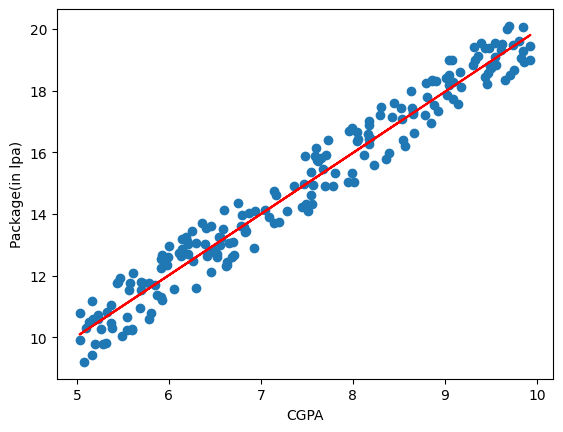

In [23]:
plt.scatter(df['CGPA'], df['Salary_Package'])
plt.plot(X_train, lr.predict(X_train), color = 'red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = lr.predict(X_test)

In [26]:
y_test.values

array([18.35, 10.72, 19.5 , 18.31, 16.89, 12.33, 10.3 , 15.32, 19.11,
       18.52, 18.62, 18.25, 11.57, 18.29, 15.6 , 16.64, 11.61, 16.78,
       19.01, 12.24, 13.4 , 17.35,  9.78, 18.51, 18.13, 12.63, 17.48,
       15.9 , 16.39, 13.5 , 19.99, 13.55, 16.4 , 12.35, 13.98, 12.6 ,
        9.9 , 17.59, 12.74, 18.57])

In [31]:
print('MAE', mean_absolute_error(y_test, y_pred))
print('MSE', mean_squared_error(y_test, y_pred))
print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2', r2_score(y_test, y_pred))

MAE 0.5577682767187374
MSE 0.3744826749429327
RMSE 0.611949895778186
R2 0.9594504798621108


### **1. MAE (Mean Absolute Error):** Value: 0.5577 LPA

* The MAE tells you the average absolute error between the predicted salaries and the actual salaries.
* On average, your predictions are off by 0.5577 LPA.
* Since the unit is LPA (Lakhs Per Annum), it’s easier to interpret directly.


### **2. MSE (Mean Squared Error):** Value: 0.3745 (LPA²)
* The MSE is the mean of the squared differences between the predicted and actual salaries.
* It penalizes larger errors more heavily because errors are squared.
* It is not directly interpretable in terms of the original unit (LPA) because it is in squared units (LPA²).

### **3. RMSE (Root Mean Squared Error):** Value: 0.6119 LPA

* The RMSE is the square root of the MSE, which brings it back to the same unit as the target variable (LPA).
* It tells you that the typical prediction error (or standard deviation of the errors) is 0.6119 LPA.
* RMSE is often used when large errors are undesirable because it penalizes larger errors more than MAE.

### **4. R² (R-squared or Coefficient of Determination):** Value: 0.9594

* The R² measures how well your regression model explains the variance in the target variable (salaries).
* An R² of 0.9594 means your model explains 95.94% of the variance in the salaries. This indicates a very good fit.


### **MAE:**

* Use it for a simplistic understanding of how far off, on average, your predictions are from the actual values.
* It's straightforward and interpretable (e.g., "On average, my salary predictions are off by 0.56 LPA").

### **RMSE:**

* Use it when large errors matter more, but you still want the error to be expressed in the same unit as the target variable.
* It emphasizes significant deviations (e.g., "Occasionally, my model's error may spike, and RMSE highlights this better").

**A big RMSE vs. MAE gap could mean the model predicts poorly for extreme CGPA ranges (e.g., very low or very high CGPA).**

**You can handle this by segmenting the data (e.g., separate models for low and high CGPA ranges) or transforming features (e.g., log transformations).**